目录
1. 项目背景
2. 加载库及数据
3. 理解数据
4. 缺失值可视化
5. 数据清洗
6. 数据可视化
7. 数据处理
8. 机器学习模型评估及结果预测

# 1. 项目背景

## 1.1 什么是客户流失？

- 客户流失，即客户停止续购公司业务/服务。
- 客户可以自主选择不同的电信行业服务供应企业，且更换服务供应企业成本很低。在这个竞争激烈的市场中，电信业务的年流失率为15-25%。
- 大多数公司都有大量的客户，如客户留存工作开展不精准，会导致成本过高，导致成效甚微甚至利润下降。如果公司能够提前预测哪些客户会流失，就能更精准的开展留存工作，将重点放在这些“高风险”客户身上。
最终目标是尽可能覆盖每一个将流失的客户并使其留存。在该行业取得商业成功的核心在于客户。
- 客户流失率是一项关键指标，因为留存的成本远低于获客成本。

## 1.2 为减少客户流失率，电信企业需要一个模型去预测哪些客户有高风险流失率

- 要预测客户是否有流失的潜在可能，首先要全面了解客户以及在不同维度的相关数据，包括服务订购历史、社交媒体互动等。
- 因此，通过解决客户流失问题，企业不仅能稳固市场地位，还能助力其进一步发展壮大。客户越多，基础设施构建成本越低，利润就越大。
因此，电信行业企业成功的关键在于减少客户流失，并实施有效的留存策略。

## 1.3 目标

- 查看流失客户和非流失客户的占比是怎样的？
- 客户性别是否与流失有关？
- 是否有某些服务类型导致了客户流失？
- 哪些服务类型使得客户流失率最低？
- 哪些服务或功能留存效果最好？

# 2. 加载库及数据

In [157]:
# 加载库
# 常规库
import pandas as pd
import numpy as np
import missingno as msno # 缺失值可视化工具
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import plotly
plotly.offline.init_notebook_mode(connected=True)


# 机器学习库
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [158]:
# 加载数据
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 3. 理解数据

- 每行代表一个客户，列数据描述客户的不同属性。

In [159]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


数据集包含如下信息：

- targets:
    - 上个月流失的客户——Churn.


- features:
    - 服务属性。即每个客户订购的服务 —— PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.
    - 合同属性。即客户的账户信息 —— tenure, Contract, PaymentMethod, PaperlessBilling, MonthlyCharges, TotalCharges.
    - 客户属性。即客户的个人信息 —— customerID, gender, SeniorCitizen , Partner, Dependents.


In [160]:
df.shape

(7043, 21)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [162]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [163]:
df.dtypes # TotalCharges 不应为object属性，应转换为数值格式。

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- 'Churn' 是我们这次建模的target。

# 4. 缺失值可视化

<AxesSubplot:>

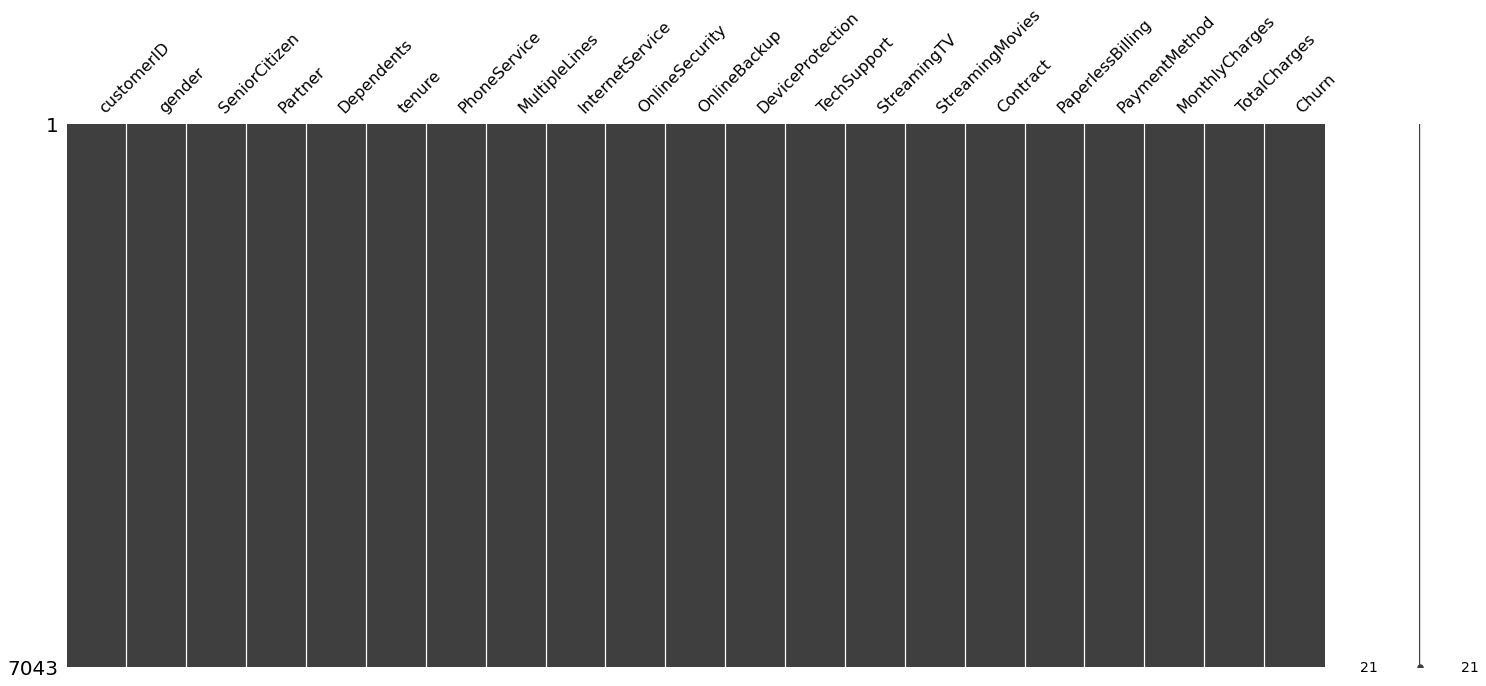

In [164]:
# 将缺失的值可视化为矩阵
msno.matrix(df)

# 常规查看缺失值
# df.isnull().sum()
# df.isnull().sum()[ df.isnull().sum() != 0] # 只看有缺失的列

- 根据上图：未发现任何缺失值。

# 5. 数据清洗

In [165]:
df = df.drop(['customerID'], axis=1) # customerID 无研究价值
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- 通过深入分析， 发现数据还是存在一些缺失值（实质为空值数据：' '）。

In [166]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce') # errors='coerce'：将无法转换为数值的原始数据强制转换为NaN
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- 存在11个缺失值。

In [167]:
df[np.isnan(df['TotalCharges'])] # 通过布尔数组的形式提取数据

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- 经查询，该11条数据的 TotalCharges 列为NaN，而 MonthCharges 列不为空，且 tenure 为0。

In [168]:
# 查看是否有其他 tenure == 0 的数据。
df[df['tenure'] == 0].index # 除了这11条外，没有额外的异常数据

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- tenure 列没有额外的缺失值数据。
- 因 tenure 列有11条值为0的数据（同时 TotalCharges 为NaN），因此删除之。数据仅有11条，不会影响数据集。

In [169]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True) # labels：删除哪些数据；axis=0：按行去删；inplace=True：影响源数据集。
df[df['tenure'] == 0].index # 不再有缺失值

Int64Index([], dtype='int64')

In [170]:
df.isnull().sum() # 不再有缺失值

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [171]:
df.shape # 数据清洗后的条数

(7032, 20)

In [172]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'}) # SeniorCitizen不应为数值格式（即此处 1 ！> 0，年老用户不比年轻用户高贵）。因此更换为object格式，进行数值替换(Yes/No)。
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [173]:
df['InternetService'].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [174]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# 6. 数据可视化

In [175]:
print(df.shape) # 可视化之前的数据结构
print(df.info()) # 1. SeniorCitizen变为object格式；2. TotalCharges变为float格式。

(7032, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null

In [176]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# 创建 subplots：使用饼图的 domain 样式
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name='Gender'), 1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name='Churn'), 1, 2)

# 使用 hole 去创建一个类甜甜圈的图像
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text='Gender and Churn Distributions',
    # 甜甜圈图像内部加注释
    annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)]
)
fig.show()



- 有26.6%的客户流失。
- 客户中有49.5%为男性、50.5%为女性。男女比例差别不大。

In [177]:
df['Churn'][df['Churn'] == 'No'].groupby(by=df['gender']).count() # 未流失的客户中，男女比例基本一致

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [178]:
df['Churn'][df['Churn'] == 'Yes'].groupby(by=df['gender']).count() # 流失的客户中，男女比例也基本一致

gender
Female    939
Male      930
Name: Churn, dtype: int64

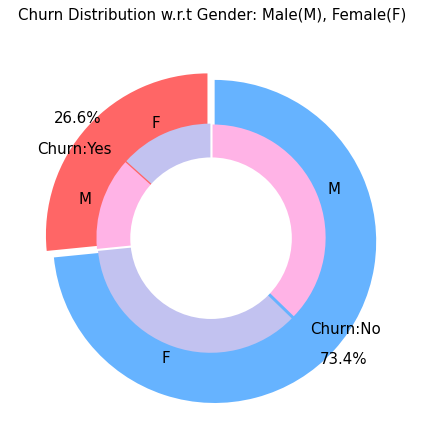

In [179]:
plt.figure(figsize=(6, 6))
labels=['Churn:Yes', 'Churn:No']
values=[1869, 5163] # 流失客户,未流失客户
labels_gender = ['F', 'M', 'F', 'M']
sizes_gender = [939, 930, 2544, 2619] # 流失的女客户， 流失的男客户， 未流失的女客户， 未流失的男客户
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {'fontsize':15}

# 绘制图像
plt.pie( 
    values, # [1869, 5163] 流失客户,未流失客户
    labels=labels, # ['Churn:Yes', 'Churn:No']
    autopct='%1.1f%%',
    pctdistance=1.08,
    labeldistance=0.8,
    colors=colors,
    startangle=90,
    frame=True,
    explode=explode,
    radius=10, # 半径
    textprops=textprops,
    counterclock=True
)
plt.pie(
    sizes_gender, # [939, 930, 2544, 2619] # 流失的女客户， 流失的男客户， 未流失的女客户， 未流失的男客户
    labels=labels_gender, # ['F', 'M', 'F', 'M']
    colors=colors_gender,
    startangle=90, 
    explode=explode_gender,
    radius=7, 
    textprops =textprops, 
    counterclock = True
)

# 绘制中间圆圈
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# 显示图像

plt.axis('equal')
plt.tight_layout()
plt.show()

- 性别与客户是否流失之间没有关系。

In [180]:
fig = px.histogram(
    df,
    x='Churn',
    color='Contract',
    barmode='group',
    title='<b>Customer contract distribution<b>'
)
fig.update_layout(width=700, height=500, bargap=0.1) # 调整图像大小
fig.show()

流失的客户中，大部分签订的都是月度合同：

- 签订月度合同中的用户，有 42.71% 的用户流失了。
- 签署年度合同的用户，有约 11% 的用户流失了。
- 签署两年度合同的用户，有约 3% 的用户流失了。

In [181]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [182]:
fig = px.histogram(
    df,
    x='Churn',
    color='PaymentMethod',
    title='<b>Customer Payment Method distribution w.r.t. Churn</b>'
)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 流失的客户中，大部分使用的是电子支票作为支付方式。
- 选择信用卡自动扣款\银行自动扣款\邮寄支票作为支付方式的客户流失可能性较小。

In [183]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [184]:
df[df['gender'] == 'Male'][['InternetService', 'Churn']].value_counts() # 男性客户

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [185]:
df[df['gender'] == 'Female'][['InternetService', 'Churn']].value_counts() # 女性客户

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [186]:
fig  = go.Figure()

fig.add_trace(go.Bar(
    x=[['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ['Female', 'Male', 'Female', 'Male']],
    y = [965, 992, 219, 240],
    name = 'DSL'
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))


fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")


fig.show()

- 很多客户选择光纤服务，而且使用光纤的客户流失率很高，这可能表明他们对这种类型的互联网服务不满意。
- 使用DSL服务的客户数量更多，与光纤服务相比，这个群体的客户流失率更低。


In [187]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}


fig = px.histogram(
    df,
    x='Churn',
    color='Dependents',
    barmode='group',
    title="<b>Dependents distribution</b>",
    color_discrete_map=color_map
)

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 没有家属的客户更容易流失。

In [188]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(
    df, 
    x="Churn", 
    color="Partner", 
    barmode="group", 
    title="<b>Chrun distribution w.r.t. Partners</b>", 
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 没有配偶的客户更容易流失。

In [189]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(
    df, 
    x="Churn", 
    color="SeniorCitizen", 
    # barmode="group",
    title="<b>Chrun distribution w.r.t. Senior Citizen</b>", 
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 老年客户数量占比很少。
- 流失客户中，多数为老年客户。

In [190]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(
    df, 
    x="Churn", 
    color="OnlineSecurity", 
    barmode="group", 
    title="<b>Churn w.r.t Online Security</b>", 
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 流失的客户中，大部分未订购在线安全服务。

In [191]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(
    df, 
    x="Churn", 
    color="PaperlessBilling",  
    title="<b>Chrun distribution w.r.t. Paperless Billing</b>", 
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 使用电子账单服务的客户更容易流失。

In [192]:
fig = px.histogram(
    df, 
    x="Churn", 
    color="TechSupport",
    barmode="group",  
    title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 缺少技术支持服务的客户更容易流失。

In [193]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(
    df, 
    x="Churn", 
    color="PhoneService", 
    title="<b>Chrun distribution w.r.t. Phone Service</b>", 
    color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 极少数客户没有电话服务。有电话服务的客户更有可能流失。

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

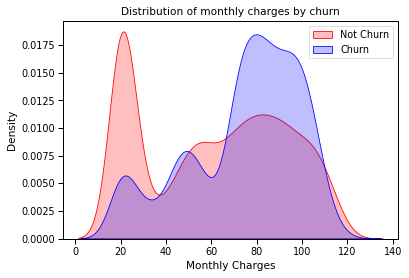

In [194]:
sns.set_context('paper', font_scale=1.1)

ax = sns.kdeplot(
    df.MonthlyCharges[(df['Churn'] == 'No')], # 非流失用户
    color='Red',
    shade=True # True 代表填充
)


ax = sns.kdeplot(
    df.MonthlyCharges[(df["Churn"] == 'Yes') ], # 流失用户
    ax =ax, 
    color="Blue", 
    shade= True
)


ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

- 月消费金额越高的客户，越容易流失。
- 月消费金额在 70-110 之间的客户流失的最多。

Text(0.5, 1.0, 'Distribution of total charges by churn')

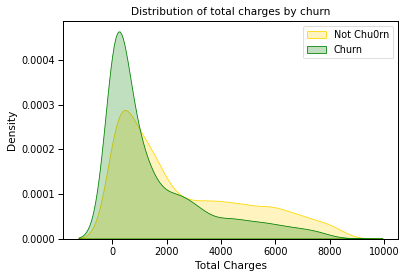

In [195]:
ax = sns.kdeplot(
    df.TotalCharges[(df["Churn"] == 'No') ],
    color="Gold", 
    shade = True)


ax = sns.kdeplot(
    df.TotalCharges[(df["Churn"] == 'Yes') ],
    ax =ax, 
    color="Green", 
    shade= True)


ax.legend(["Not Chu0rn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [196]:
fig = px.box(
    df, 
    x='Churn', 
    y='tenure'
)

# 设置Y轴属性
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# 设置X轴属性
fig.update_xaxes(title_text='Churn', row=1, col=1)

# 设置图像大小、字体及标题
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

- 新客户更容易流失。

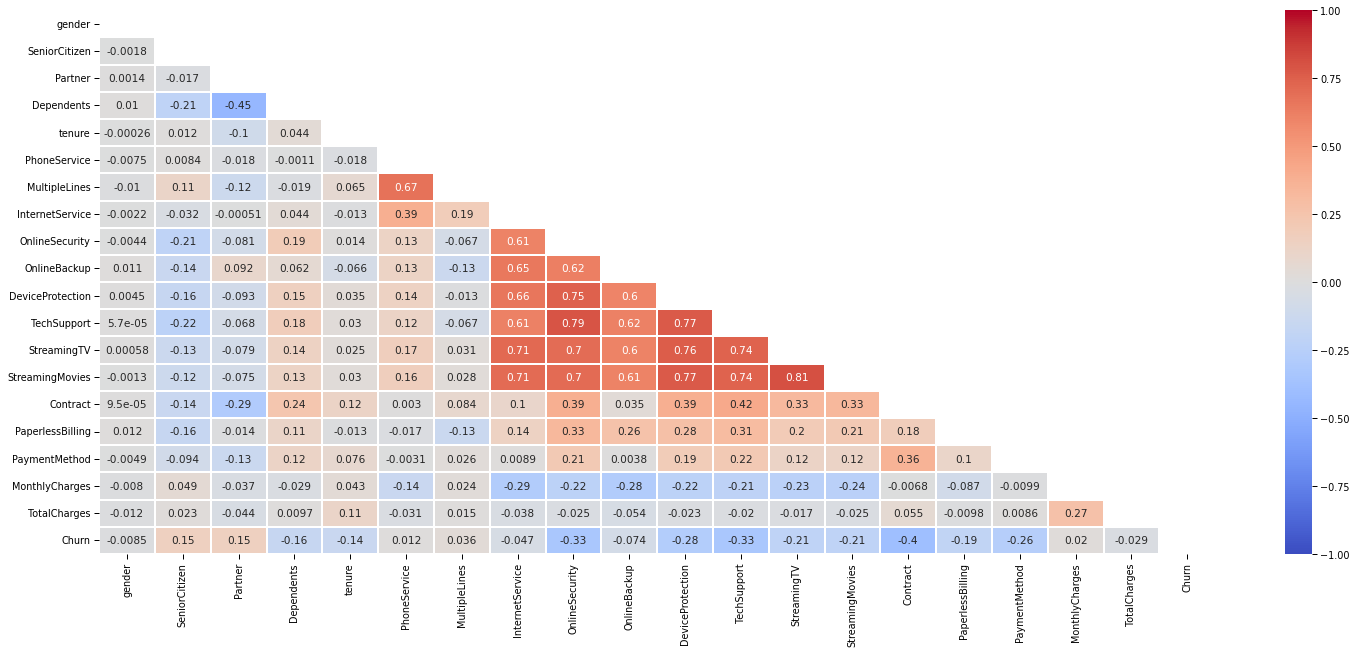

In [197]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x:pd.factorize(x)[0]).corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# 7. 数据处理

## 7.1 划分数据集为训练集和测试集

In [198]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series) # LabelEncoder会将object类型的数据按顺序编码，如0，1，2，3。而OneHotEncoder会将数据变成OneHot编码
    return dataframe_series

In [199]:
df = df.apply(lambda x: object_to_int(x)) # 对于df而言，apply应用的是每个serires，传入的x也是每个series
print(df.head())
print(df.info())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [200]:
plt.figure(figsize=(14, 7))
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [201]:
X = df.drop(columns=['Churn'])
y = df['Churn'].values

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [203]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title('Distribution for {}'.format(feature))
    ax = sns.distplot(frame[feature], color=color)

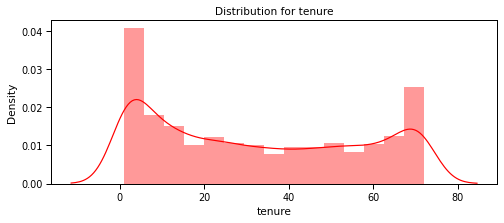

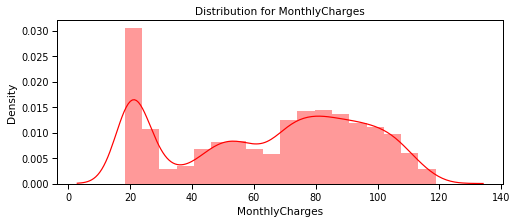

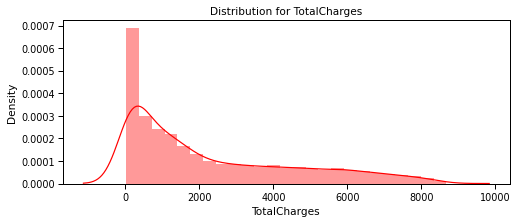

In [204]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
    distplot(feat, df)

- 上述三个数值型特征值分布范围差异很大，因此先将上述三个特征值缩放至同一范围。

## 7.2 对数值型特征值做标准化

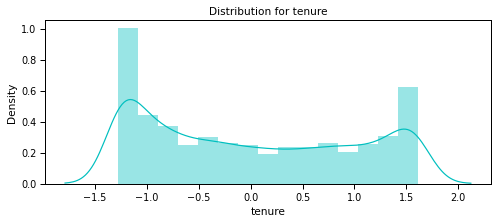

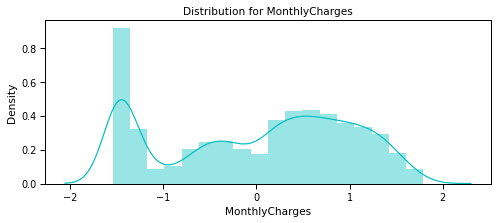

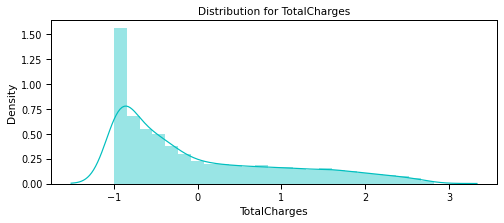

In [205]:
df_std = pd.DataFrame(
    StandardScaler().fit_transform(df[num_cols].astype('float64')),
    columns=num_cols
)

for feat in num_cols:
    distplot(feat, df_std, color='c') # 数据已经缩放

In [206]:
# 将特征值分成3类，一类进行标准化处理、一类进行标签编码、一类进行one-hot编码

cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService'] # 该类进行 one-hot 编码
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe)) # 剩下的需要进行标签编码

In [207]:
# 1. 对数值型特征值进行标准化处理
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [208]:
# 2. 对多种类型的离散型特征值进行 one-hot 编码
X_train[cat_cols_ohe] = X_train[cat_cols_ohe].astype('object')
X_test[cat_cols_ohe] = X_test[cat_cols_ohe].astype('object')


X_train = pd.get_dummies(X_train, columns=cat_cols_ohe)
X_test = pd.get_dummies(X_test, columns=cat_cols_ohe)

In [209]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Contract_0,Contract_1,Contract_2,InternetService_0,InternetService_1,InternetService_2
983,1,0,0,0,-1.281139,1,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6565,1,0,1,0,1.170193,1,2,2,2,0,...,0,0,1,0,1,0,0,0,1,0
2212,1,0,0,0,-0.913439,1,0,1,1,1,...,0,0,0,1,0,1,0,0,0,1
2526,1,0,0,0,-1.281139,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,1
2751,0,0,1,1,-0.545739,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0


# 8.机器学习模型评估及结果预测

In [210]:
X_train.shape

(4922, 26)

## 8.1 KNN

In [211]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)


KNN accuracy: 0.7734597156398104


In [212]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.58      0.52      0.55       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.77      0.77      2110



## 8.2 SVC

In [213]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8033175355450237


In [214]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



## 8.3 Random Forest

In [215]:
model_rf = RandomForestClassifier(n_estimators=500 , 
                                  oob_score = True, 
                                  n_jobs = -1,
                                  random_state =50, 
                                  max_features = "auto",
                                  max_leaf_nodes = 30

                                )
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8118483412322275


In [216]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.70      0.52      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



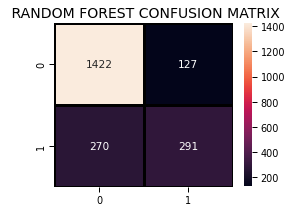

In [217]:
plt.figure(figsize=(4, 3))
sns.heatmap(
    confusion_matrix(y_test, prediction_test),
    annot=True,
    fmt='d',
    linecolor='k',
    linewidths=3
)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

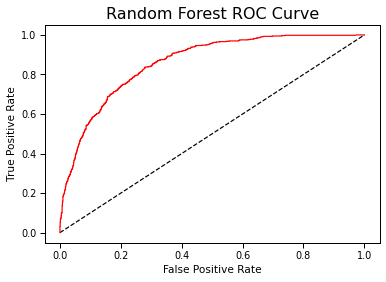

In [218]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

## 8.4 Logistic Regression

In [219]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8104265402843602


In [220]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.57      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



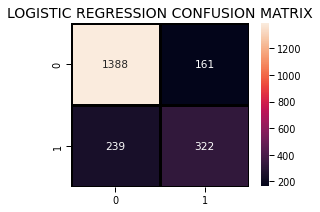

In [221]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

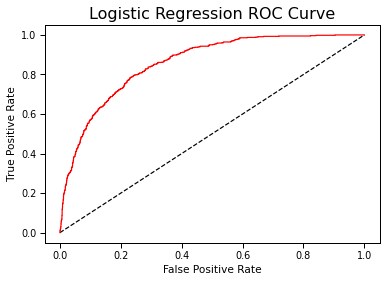

In [222]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

## 8.5 Decision Tree Classifier

In [223]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt) # 决策树算法给出的准确率评分较低

Decision Tree accuracy is : 0.738388625592417


In [224]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.51      0.54      0.52       561

    accuracy                           0.74      2110
   macro avg       0.67      0.68      0.67      2110
weighted avg       0.74      0.74      0.74      2110



## 8.6 AdaBoost Classifier

In [225]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.809478672985782

In [226]:
print(classification_report(y_test, a_preds))


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1549
           1       0.68      0.53      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



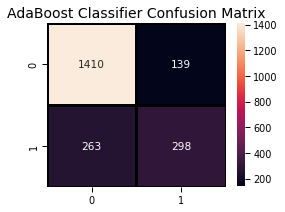

In [227]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

## 8.7 Gradient Boosting Classifier

In [228]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7995260663507109


In [229]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1549
           1       0.64      0.57      0.60       561

    accuracy                           0.80      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.79      0.80      0.80      2110



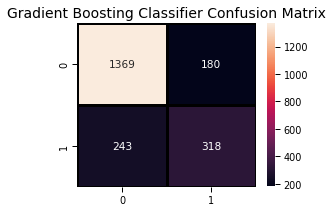

In [230]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

## 8.8 Voting Classifier

In [231]:
# 根据投票结果去预测流失结果

from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft') # Soft Voting Classifier：将所有模型预测样本为某一类别的概率的平均值作为标准，概率最高的对应的类型为最终的预测结果
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8161137440758294


In [232]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



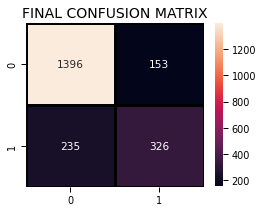

In [233]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

- 从混淆矩阵中我们可以看到：
总共有 1397+152=1549 个客户实际上未流失，算法预测其中1397个客户未流失、152个客户流失。
而实际客户数为 237+324=561 个，算法预测其中237为未流失客户，324为流失客户。

- 客户流失对公司的盈利能力肯定是不利的。企业可以实施各种策略来消除客户流失。
避免客户流失的最好方法是让公司真正了解自己的客户。这包括识别那些面临大量流失风险的客户，并努力提高他们的满意度。
当然，改善客户服务是解决这一问题的首要任务。通过相关体验和专业服务建立客户忠诚度是减少客户流失的另一种策略。
一些公司对流失客户进行调研，了解流失原因，采取针对性措施避免未来的客户流失。